# **Ejemplo de aplicación con SVM para el dataset de Iris**

**Descripción del dataset:**

**Objetivo:** El dataset Iris es utilizado para problemas de clasificación. El objetivo es predecir la especie de una flor de iris (clasificación) basada en las medidas de sus características físicas.

**Clases:** Hay tres clases (especies) de flores:

*   Setosa
*   Versicolor
*   Virginica

**Características:** El dataset contiene 150 observaciones, cada una con 4 características (medidas) que describen las flores:

* Largo del sépalo (en cm)
* Ancho del sépalo (en cm)
* Largo del pétalo (en cm)
* Ancho del pétalo (en cm)

**Distribución de las clases:**

* Cada clase tiene 50 ejemplos.
* Las clases Setosa y Versicolor están perfectamente separadas linealmente, mientras que Versicolor y Virginica están algo superpuestas, lo que hace que la clasificación entre estas últimas dos sea más difícil.

Overall Accuracy (SVM): 1.0000

Classification Report (SVM):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



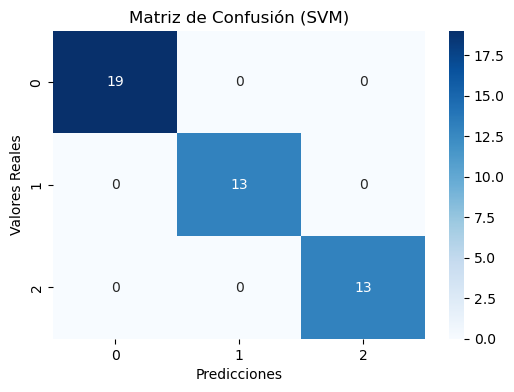

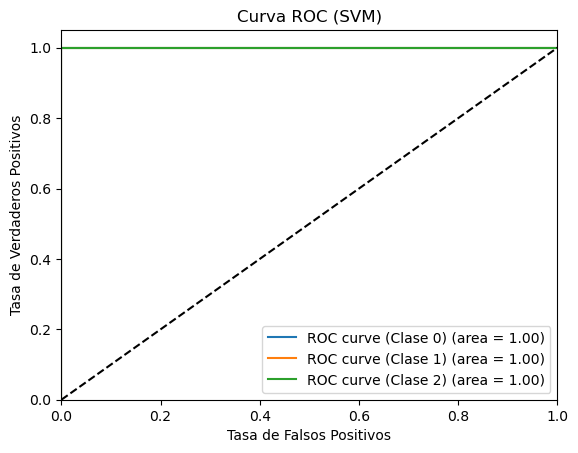

In [3]:
# Importar librerías
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar el dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Parámetros que se pueden modificar
kernel_type = 'rbf'  # 'linear', 'poly', 'rbf', 'sigmoid'
C_value = 1.0  # 0.1, 1.0, 10, 100
decision_function_shape = 'ovo'  # 'ovo' (One-vs-One), 'ovr' (One-vs-Rest)

# Definimos el clasificador SVM
svm_model = SVC(kernel=kernel_type, C=C_value, decision_function_shape=decision_function_shape, probability=True)

# Entrenamos el modelo
svm_model.fit(X_train, y_train)

# Hacemos predicciones
y_pred = svm_model.predict(X_test)

# Matriz de confusión y overall accuracy
conf_matrix_svm = confusion_matrix(y_test, y_pred)
overall_accuracy_svm = np.mean(y_test == y_pred)
print(f"Overall Accuracy (SVM): {overall_accuracy_svm:.4f}")
print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred))

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión (SVM)')
plt.show()

# Calcular y graficar ROC y AUC para cada clase
fpr_svm = {}
tpr_svm = {}
roc_auc_svm = {}

for i in range(3):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, i], pos_label=i)
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

# Graficar todas las ROC curves
plt.figure()
for i in range(3):
    plt.plot(fpr_svm[i], tpr_svm[i], label=f'ROC curve (Clase {i}) (area = {roc_auc_svm[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (SVM)')
plt.legend(loc="lower right")
plt.show()

Los resultados muestran un rendimiento perfecto del modelo SVM con kernel RBF en el dataset Iris, alcanzando una precisión del 100% en el conjunto de prueba. La matriz de confusión confirma una clasificación impecable: 19 muestras de la clase 0, 13 de la clase 1 y 13 de la clase 2, todas correctamente clasificadas sin ningún error. Las curvas ROC muestran un AUC de 1.00 para las tres clases, confirmando que el modelo tiene una capacidad de discriminación perfecta entre las diferentes especies de iris, sin falsos positivos ni falsos negativos.

# **Taller 6 - Parte 3**

1. **Efecto del kernel sobre el desempeño del SVM:**

* **Instrucción:** Entrena un modelo SVM usando al menos tres tipos de kernels: lineal, polinomial, y gaussiano (RBF). Compara los resultados de precisión, tiempo de ejecución y matriz de confusión.

* **Preguntas:**
- ¿Cómo influye el tipo de kernel en la precisión del modelo?
- ¿Qué diferencias observas en el tiempo de cómputo entre los diferentes kernels?
- ¿Cuál kernel se ajusta mejor al conjunto de datos de Iris y por qué crees que sucede esto?

2. **Impacto del parámetro de regularización 𝐶:**

* **Instrucción:** Entrena un modelo SVM variando el parámetro 𝐶 (usa valores como 0.1, 1, 10, 100) con el kernel gaussiano (RBF). Evalúa la precisión y el tiempo de entrenamiento para cada valor de 𝐶.

* **Preguntas:**
- ¿Cómo afecta el parámetro 𝐶 a la precisión del modelo?
- ¿Qué valores de 𝐶 parecen sobreajustar o infraajustar el modelo?
- ¿Qué relación encuentras entre 𝐶 y el tiempo de cómputo?

3. **Evaluación de la función de decisión (One-vs-One vs One-vs-Rest):**

* **Instrucción:** Usa la implementación de SVM para entrenar el modelo con ambas funciones de decisión (ovr para One-vs-Rest y ovo para One-vs-One). Compara la precisión y el tiempo de cómputo.

* **Preguntas:**
- ¿Cuál función de decisión (ovr o ovo) resulta más precisa para el conjunto de datos?
- ¿Qué diferencias encuentras en el tiempo de cómputo entre ambos enfoques?
- ¿En qué escenarios recomendarías usar una función de decisión sobre la otra?

4. **Evaluación del tiempo de cómputo:**

* **Instrucción:** Mide el tiempo total de cómputo para cada configuración de kernel y valores de 𝐶. Compara cómo varía el tiempo de ejecución dependiendo de la complejidad del modelo.

* **Preguntas:**
- ¿Cuál es el trade-off entre precisión y tiempo de cómputo cuando ajustas el parámetro 𝐶 y el kernel?
- ¿Qué configuración recomendarías si tu objetivo principal es reducir el tiempo de cómputo?
- ¿Cómo puedes balancear la necesidad de alta precisión con un tiempo de cómputo manejable?
